In [23]:
import pandas as pd
import numpy as np
import networkx as nx
import math
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import re
from fa2 import ForceAtlas2
from collections import Counter

In [24]:
df = pd.read_csv("/Users/yuesongyang/Desktop/Social_graphs/files/data_US_congress/H115.csv")

In [25]:
names=df.WikiPageName.tolist()
parties=df.Party.tolist()
states=df.State.tolist()
# wiki="https://en.wikipedia.org/wiki/"
# name_links=[wiki+name for name in names]

G=nx.DiGraph()
for i in range(len(names)):
    G.add_node(names[i], party = parties[i], state = states[i])

In [26]:
def getString(name):
    file = pickle.load(
        open( "/Users/yuesongyang/Desktop/Graph_exercise/115/" + name + ".pickle", 
             "rb"))
    try:
        res=file['pages'][[str(i) for i in file['pages'].keys()][0]]['revisions'][0]['*']
        return res
    except:
        print(name + " data not found")
        return ""
    
def getLinks(String):
    return re.findall("\[\[(.*?)\]\]",String)

def parseLink(links):
    res=[]
    for link in links:
        if '|' in link:
            index=link.index('|')
            res.append(link[:index])
            res.append(link[index+1:])
        else:
            res.append(link)
    return res

def pipe(target,Graph):
    String=getString(target)
    links=getLinks(String)
    parsedLinks=parseLink(links)
    for link in parsedLinks:
#         url = "https://en.wikipedia.org/wiki/" + link
#         result = requests.get(url)
        link_underscore=link.replace(" ","_")
        if link_underscore in names:
            Graph.add_edge(target , link_underscore)

In [27]:
for target in names:
    pipe(target,G)

Jerrold_Nadler data not found
Michael_F._Doyle data not found
Tim_Ryan_(politician) data not found
Joaquín_Castro data not found


0.4452285626989212


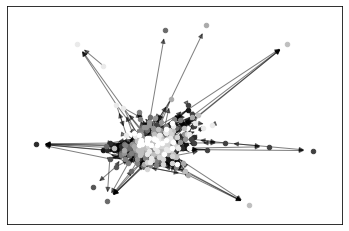

In [28]:
import community
import networkx as nx
import matplotlib.pyplot as plt

#first compute the best partition
F=G.to_undirected()
partition = community.best_partition(F)
print(community.modularity(partition, F, weight='weight'))

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()